## Problem Statement


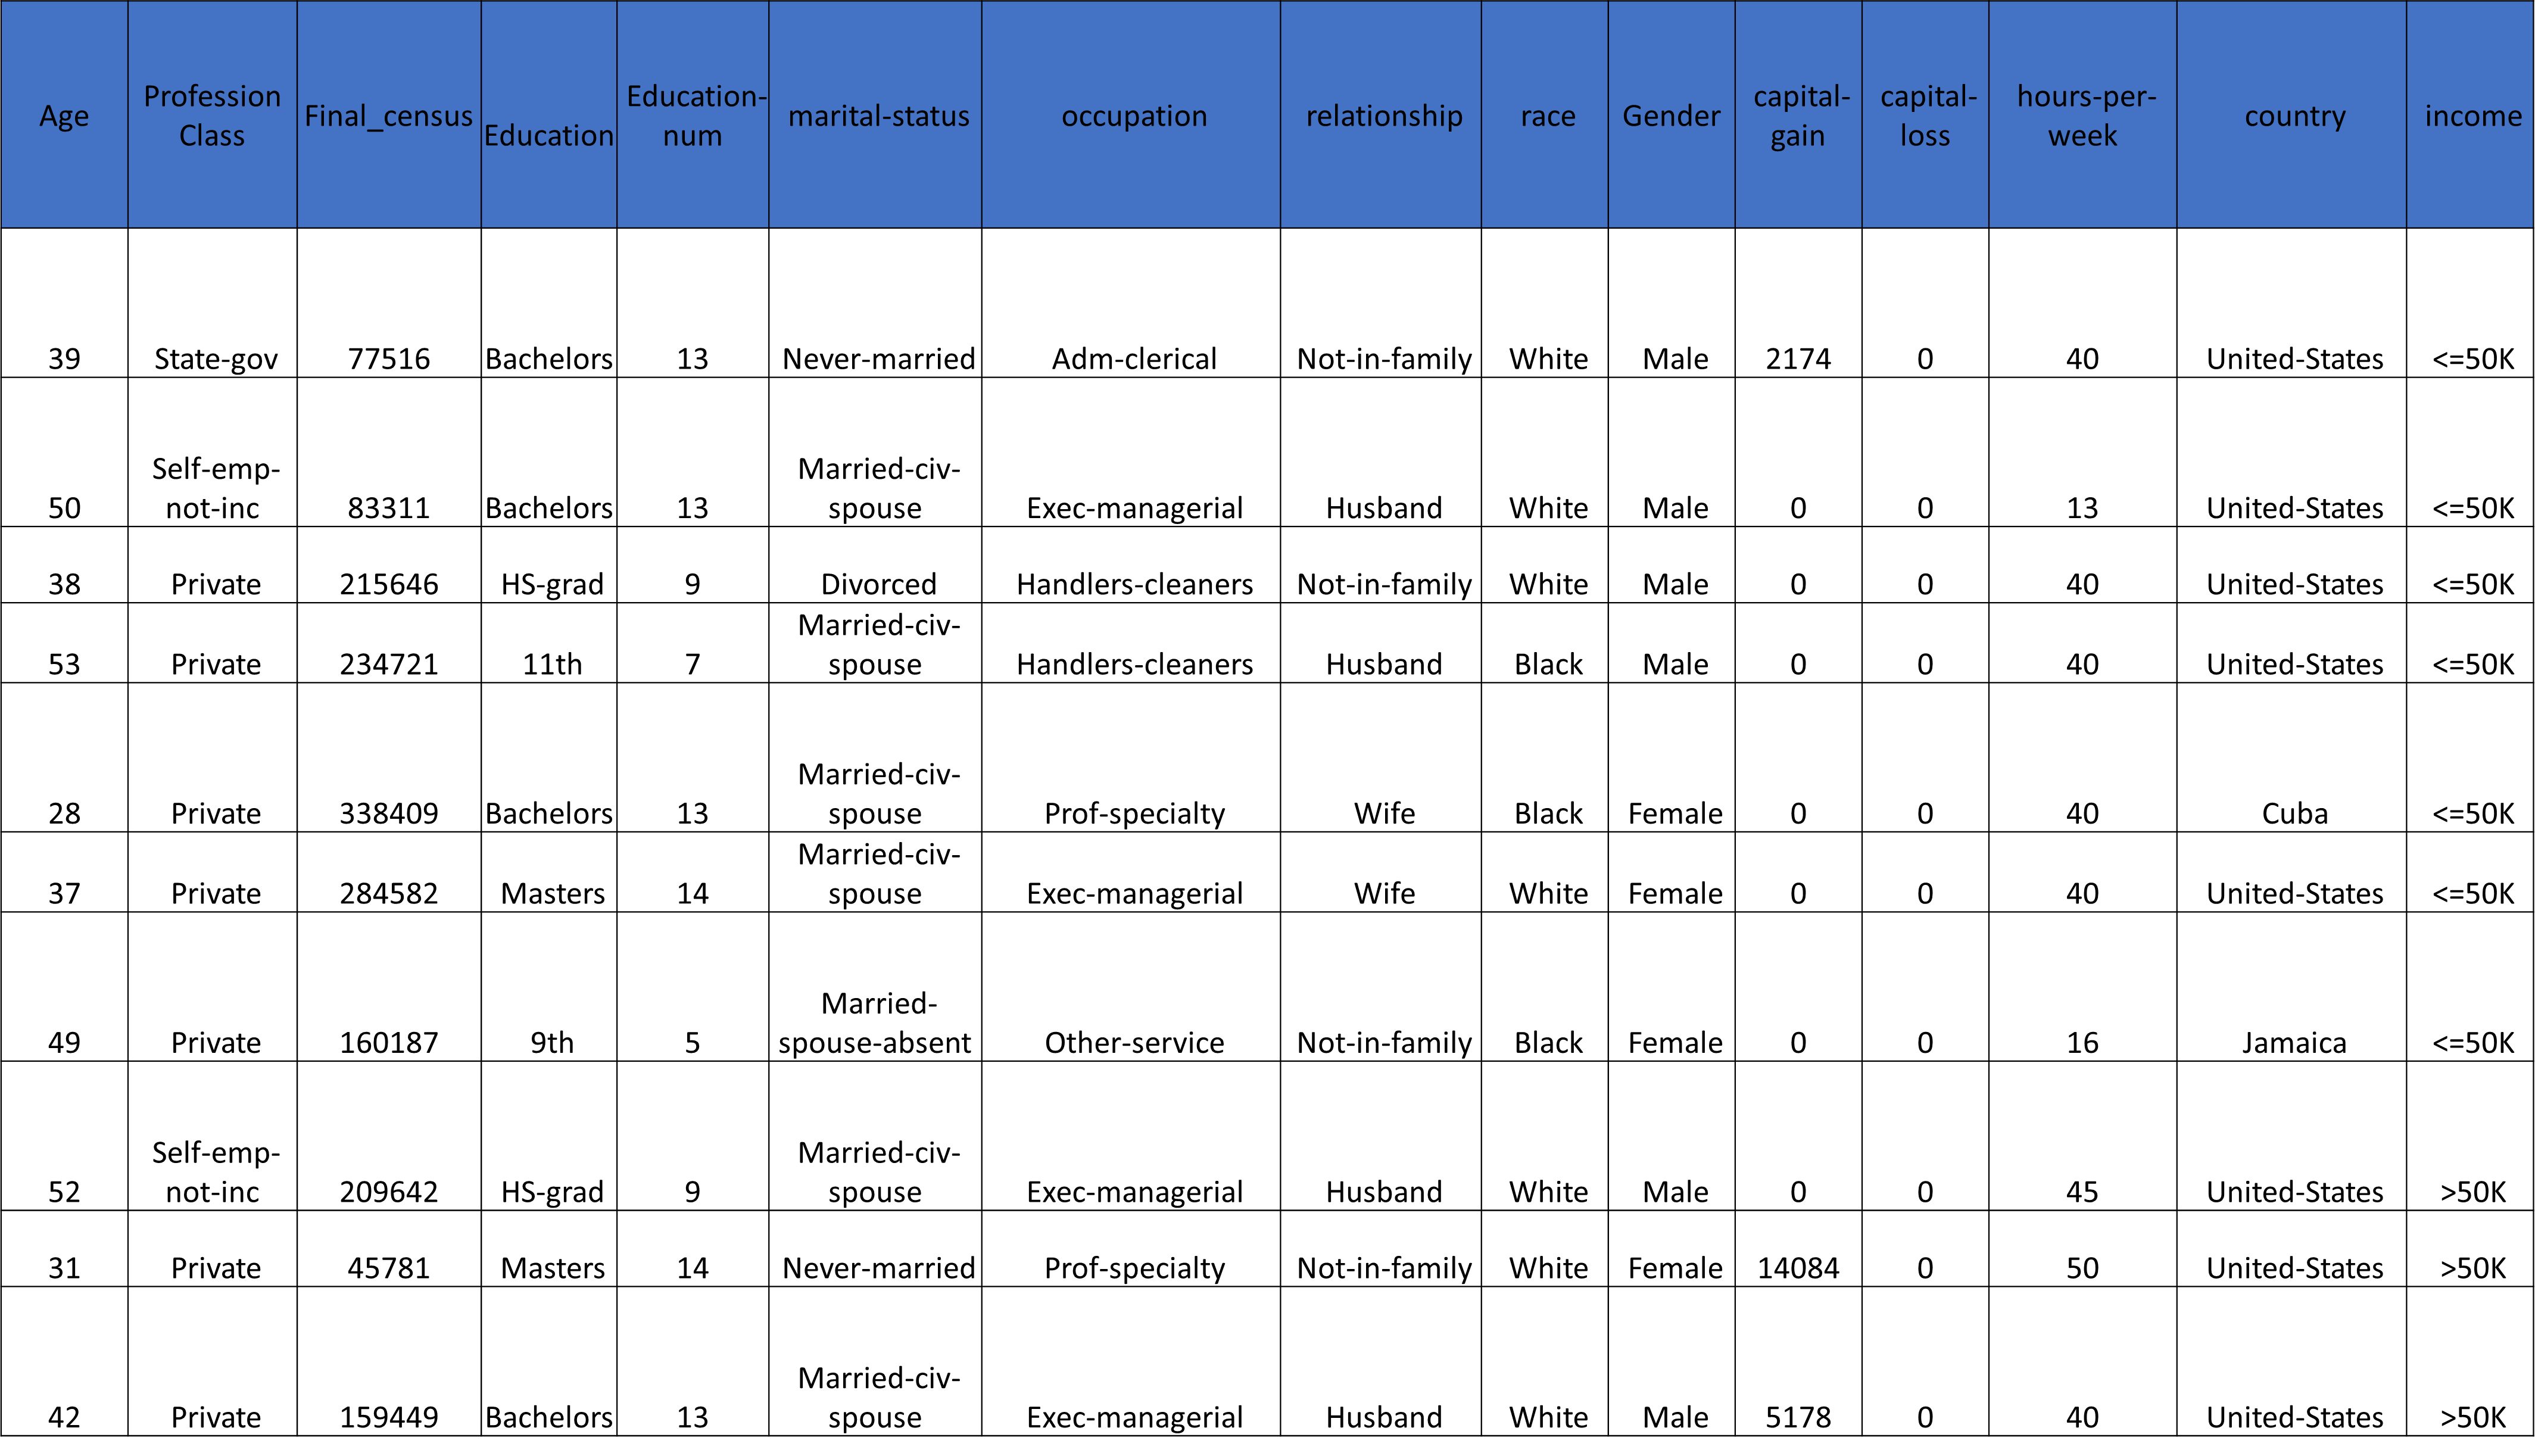

## <span style="color:red">This is the data of Income evaluation for different countries. Based on the available features, build a model to predict whether a person's income exceeds a certain threshold (e.g., <=50K or >50K), Which will help to identify the factors that contribute to higher incomes.


<hr style="border:2px solid red">

#### Importing the Libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Load the data

In [71]:
df=pd.read_csv('Data_inc.csv')

In [72]:
df.head(5)

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


In [73]:
#here i am seeing an extra col named Unnamed 15
# we'll remove it

df.drop(columns='Unnamed: 15',inplace=True)

In [74]:
df.head(5)

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Profession Class  32561 non-null  object
 2   Final_census      32561 non-null  int64 
 3    Education        32561 non-null  object
 4    Education-num    32561 non-null  int64 
 5    marital-status   32561 non-null  object
 6    occupation       32561 non-null  object
 7    relationship     32561 non-null  object
 8    race             32561 non-null  object
 9   Gender            32561 non-null  object
 10   capital-gain     32561 non-null  int64 
 11   capital-loss     32561 non-null  int64 
 12   hours-per-week   32561 non-null  int64 
 13   country          32561 non-null  object
 14   income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### I have 14 Independent variable and 1 dependent variable and 32560 rows here. We have to predict income range here (>=50k or <=50k) which is a classification task

<hr style="border:1px solid black">
The column names has unnecessary whitespace before and after the name as well as in the rows

In [76]:
df.columns = df.columns.str.replace(' ', '')

In [77]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=df[i].str.strip()

<hr style="border:1px solid black">
Let's rename some cols name for convinience

In [78]:
df.rename(columns = {'marital-status':'Marital_status',
                     'Education-num':'Study_duration(years)',
                     'Education':'Qualification',
                     'ProfessionClass':'Working_under',
                     'hours-per-week':'Total_working_hours',
                     'race':'Race',
                     'capital-gain':'Capital_gain',
                     'capital-loss':'Capital_loss',
                     'occupation':'Occupation',
                     'relationship':'Dependent',
                     'income':'Income'}, inplace = True)

In [79]:
df['Income'].replace(to_replace=['<=50K','>50K'],value=[0,1],inplace=True)

#<=50K -- 0
# >50K -- 1

<hr style="border:1px solid black">
Now we'll check missing values

In [80]:
df.isnull().sum()

Age                      0
Working_under            0
Final_census             0
Qualification            0
Study_duration(years)    0
Marital_status           0
Occupation               0
Dependent                0
Race                     0
Gender                   0
Capital_gain             0
Capital_loss             0
Total_working_hours      0
country                  0
Income                   0
dtype: int64

as i can see there is no missing values here &uarr;&uarr;&uarr;&uarr;

<hr style="border:1px solid black">
Now we'll check the categorical variable values &darr;&darr;&darr;&darr;

In [81]:
for i in df.columns:
    if df[i].dtype== 'object':
        print(f'Column:-{i}','\n',df[i].unique())

Column:-Working_under 
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Column:-Qualification 
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
Column:-Marital_status 
 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
Column:-Occupation 
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
Column:-Dependent 
 ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
Column:-Race 
 ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
Column:-Gender 
 ['Male' 'Female']
Column:-country 
 ['United-States' 'Cuba' 'Ja

<hr style="border:1px solid black">
we'll remove all the '?' from df

In [82]:
waste = df[(df.country=='?')&(df.Working_under=='?')&(df.Occupation=='?')].index
df.drop(waste, inplace=True)

In [83]:
waste2=df[(df.Working_under == '?')&(df.Occupation =='?')].index
df.drop(waste2,inplace=True)

In [84]:
waste3 = df[(df.Occupation =='?')].index
df.drop(waste3, inplace=True)

In [85]:
waste4=df[(df.country =='?')].index
df.drop(waste4,inplace=True)

<hr style="border:1px solid black">
As I can see if I can reduce some type in some columns for my convinience

In [86]:
Edu = list(df['Qualification'].unique())
ug = ['11th','9th','7th-8th','5th-6th','10th','Preschool','12th','1st-4th']
pg = ['Masters','Prof-school']
diploma = ['HS-grad','Assoc-voc','Some-college','Assoc-acdm']

MaritalStatus = list(df['Marital_status'].unique())
um = ['Never-married','Married-spouse-absent']
mar = ['Married-civ-spouse','Married-AF-spouse']
div=['Divorced','Separated']

In [87]:
for study in Edu:
    if study in ug:
        df['Qualification'].replace(study, 'Undergraduate',inplace=True)
    elif study in pg:
        df['Qualification'].replace(study, 'Postgraduate',inplace=True)
    elif study in diploma:
        df['Qualification'].replace(study, 'Diploma',inplace=True)
    elif study == 'Bachelors':
        df['Qualification'].replace(study, 'Graduate',inplace=True)
        
        
for status in MaritalStatus:
    if status in um:
        df['Marital_status'].replace(status, 'Unmarried',inplace=True)
    elif status in mar:
        df['Marital_status'].replace(status, 'Married',inplace=True)
    elif status in div:
        df['Marital_status'].replace(status, 'Divorced',inplace=True)     

<hr style="border:1px solid black">
Correlation Check

<AxesSubplot:>

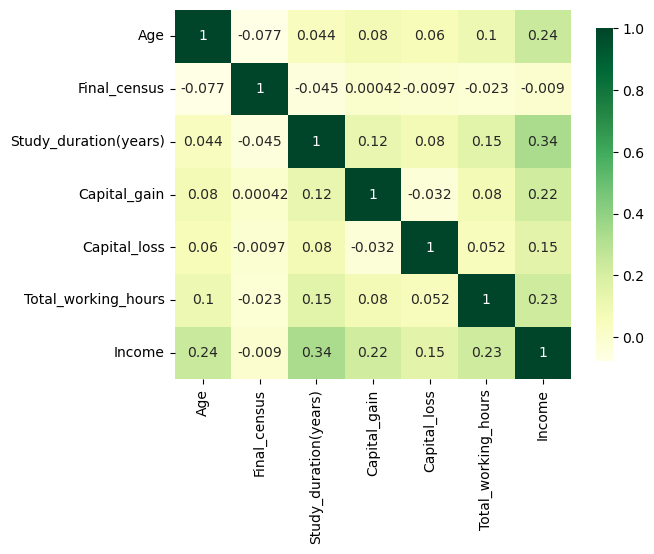

In [88]:
sns.heatmap(df.corr(), cmap = "YlGn",cbar_kws={'shrink':.9 }, annot=True)

There is no column present with high correlation

<hr style="border:1px solid black">
Now I'll move to Exploratory Data Analysis

***Univariate Analysis*** &darr;&darr;&darr;&darr;

- Income Range&darr;&darr;

In [89]:
inc=pd.DataFrame(df.Income.value_counts()/df.Income.count()*100)
inc.reset_index(inplace=True)
inc.columns=['Range','Percentage']

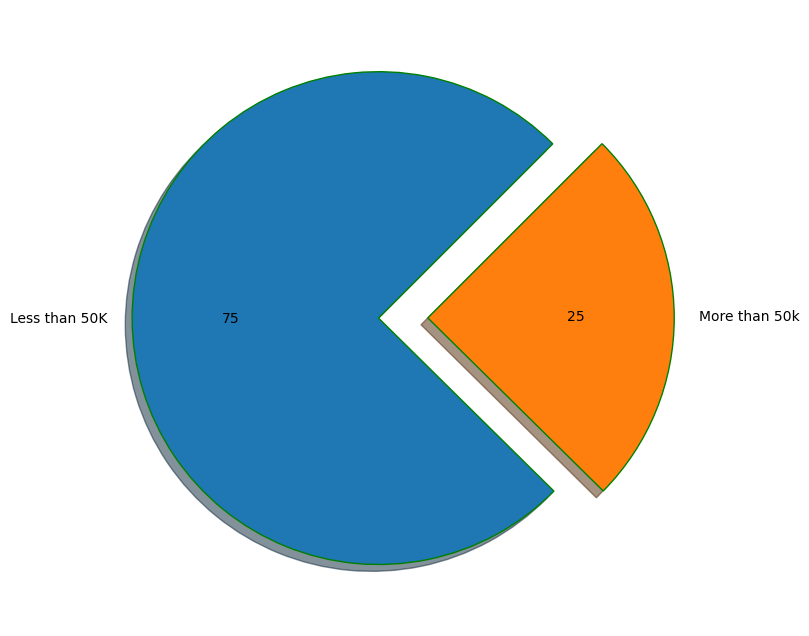

In [90]:
plt.figure(figsize=(12,8))
wp = {'linewidth' : 1, 'edgecolor' : "green" }
plt.pie(inc.iloc[:,-1],labels=['Less than 50K','More than 50k'],explode=[0.1,0.1],autopct='%1.0f',shadow=True,
       wedgeprops=wp,startangle = 45)
plt.show()

&darr;              &darr;               &darr;           &darr;             &darr;                &darr;             &darr;&darr;                    &darr;   &darr;&darr;&darr;

1. 75% of entire population is getting less than 50K salary due to major part of population are working under labour class
2. Rest 25% are surely highly educated and holds good position due to which they are getting more than 50k salary

- Gender Distribution

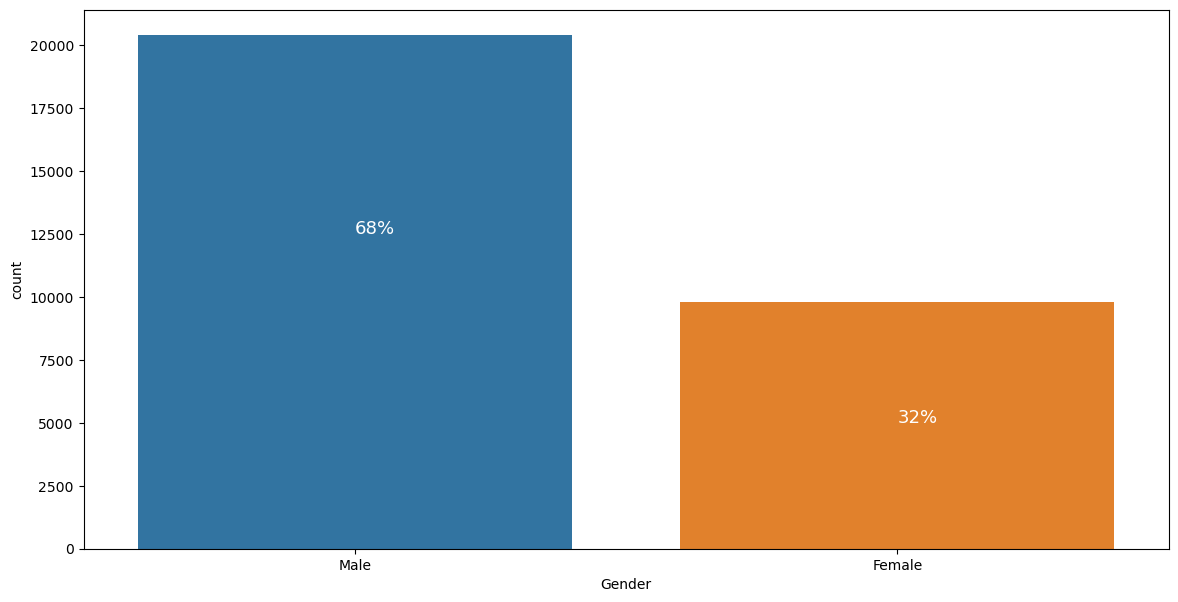

In [91]:
plt.figure(figsize=(14,7))
plot=sns.countplot(x='Gender',data=df)
plt.text(0,12500,'68%',color='white',size=13)
plt.text(1,5000,'32%',size=13,color='w')
plt.show()

&darr;              &darr;               &darr;           &darr;             &darr;                &darr;             &darr;&darr;                    &darr;   &darr;&darr;&darr;

1. Gender distribution isn't equal, and clearly this dataset is male dominant
2. only 32% population is females which leads to the fact that at the time of this dataset creation, females aren't sufficiently educated and salaried.

- Qualification&darr;&darr;

In [92]:
e = df['Qualification'].value_counts()/df['Qualification'].count()*100
ed=pd.DataFrame(e)
ed.reset_index(inplace=True)
ed.columns=['Qualification','population_%']


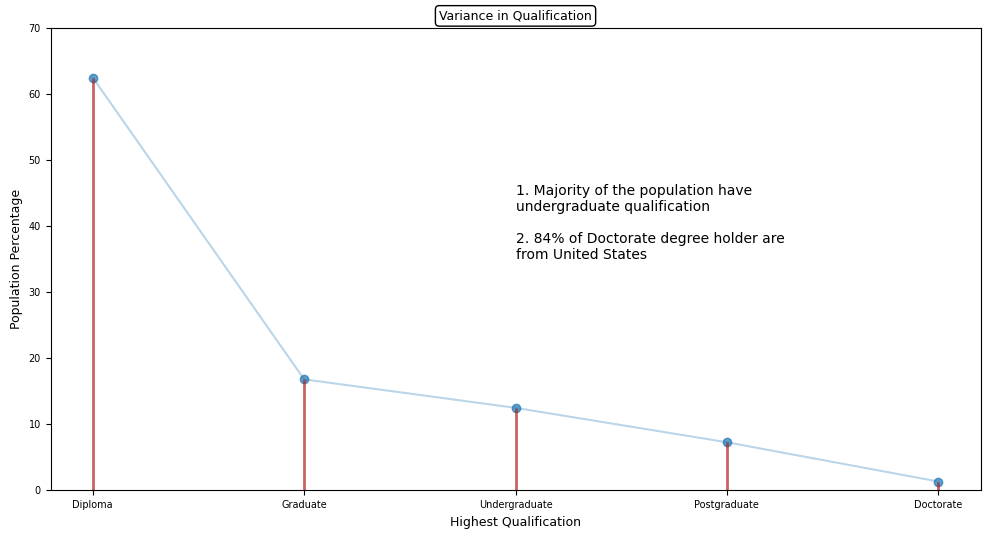

In [93]:
plt.figure(figsize=(12,6))

plt.scatter(ed['Qualification'],ed['population_%'],alpha=0.7)
plt.vlines(x=ed['Qualification'], ymin=0, ymax=ed['population_%'], color='firebrick', alpha=0.7, linewidth=2)
plt.plot(ed['Qualification'],ed['population_%'],alpha=0.3)

plt.title('Variance in Qualification',bbox=dict(facecolor='w',edgecolor='k', boxstyle='round'),size=9)
plt.xlabel('Highest Qualification',size=9)
plt.ylabel('Population Percentage',size=9)
plt.text(2,35,'1. Majority of the population have \nundergraduate qualification\n\n2. 84% of Doctorate degree holder are \nfrom United States')

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylim(0,70)


plt.show()

- Profession Class &darr;&darr;

In [94]:
p= df['Working_under'].value_counts()/df['Working_under'].count()*100
pc=pd.DataFrame(p)
pc.reset_index(inplace=True)
pc.columns=['Working_under','population_%']

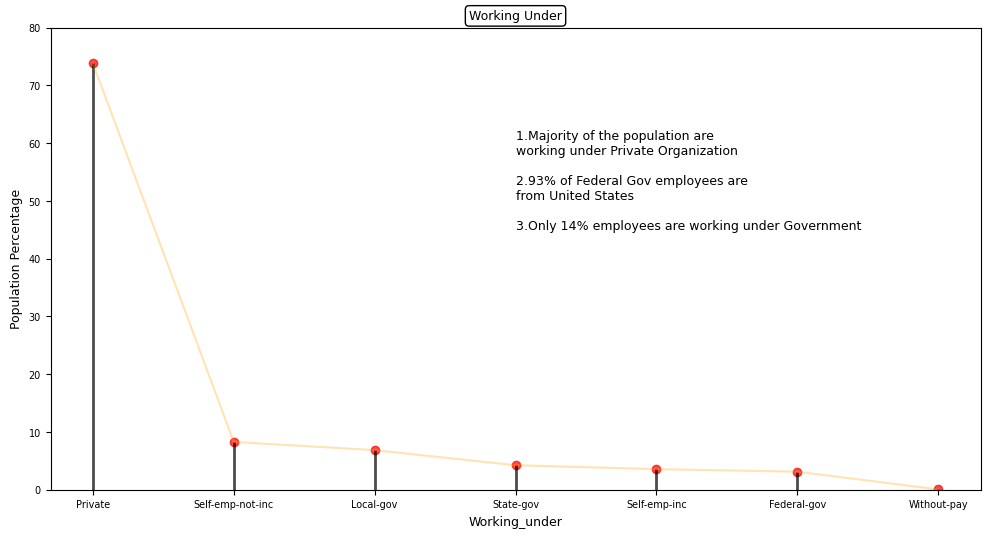

In [95]:
plt.figure(figsize=(12,6))

plt.scatter(pc['Working_under'],pc['population_%'],alpha=0.7,color='red')
plt.vlines(x=pc['Working_under'], ymin=0, ymax=pc['population_%'], color='black', alpha=0.7, linewidth=2)
plt.plot(pc['Working_under'],pc['population_%'],alpha=0.3,color='orange')

plt.title('Working Under',bbox=dict(facecolor='w',edgecolor='k', boxstyle='round'),size=9)
plt.xlabel('Working_under',size=9)
plt.ylabel('Population Percentage',size=9)
plt.text(3,45,'1.Majority of the population are\nworking under Private Organization \n\n2.93% of Federal Gov employees are\nfrom United States\n\n3.Only 14% employees are working under Government',size=9)

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylim(0,80)


plt.show()

- Occupation &darr;&darr;

In [96]:
oc = df['Occupation'].value_counts()/df['Occupation'].count()*100
occ = pd.DataFrame(oc)
occ.reset_index(inplace=True)
occ.columns = ['Occupation','population%']

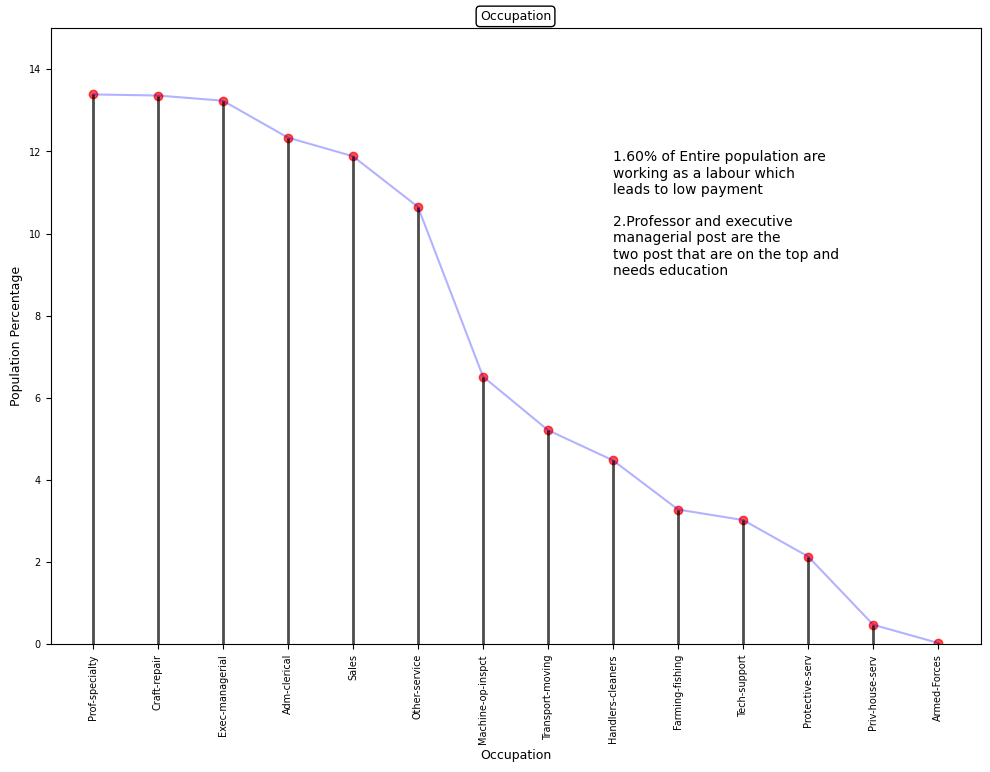

In [97]:
plt.figure(figsize=(12,8))

plt.scatter(occ['Occupation'],occ['population%'],alpha=0.7,color='red')
plt.vlines(x=occ['Occupation'], ymin=0, ymax=occ['population%'], color='black', alpha=0.7, linewidth=2)
plt.plot(occ['Occupation'],occ['population%'],alpha=0.3,color='blue')

plt.title('Occupation',bbox=dict(facecolor='w',edgecolor='k', boxstyle='round'),size=9)
plt.xlabel('Occupation',size=9)
plt.ylabel('Population Percentage',size=9)
plt.text(8,9,'1.60% of Entire population are\nworking as a labour which\nleads to low payment\n\n2.Professor and executive\nmanagerial post are the\ntwo post that are on the top and \nneeds education')
plt.xticks(fontsize=7,rotation=90)
plt.yticks(fontsize=7)
plt.ylim(0,15)


plt.show()

- country &darr;&darr;

In [98]:
country = df.country.value_counts()/301.62
co = pd.DataFrame(country)
co.reset_index(inplace=True)
co.columns = ['Country','Population%']

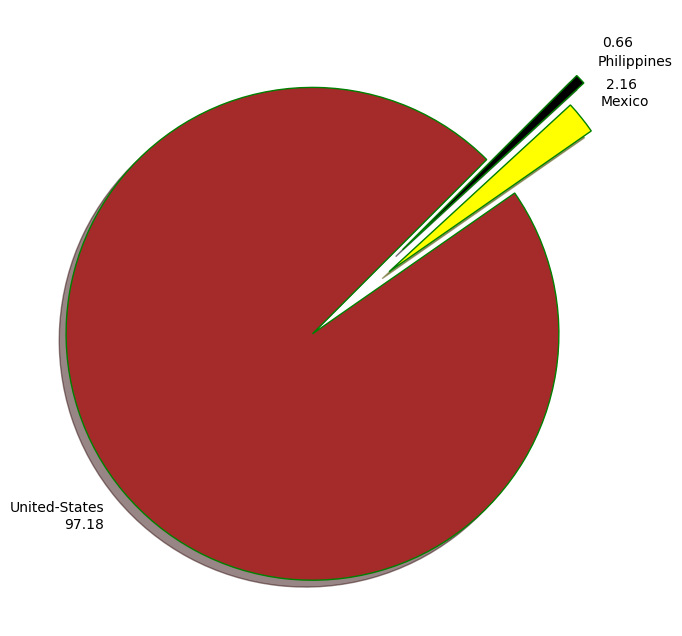

In [99]:
plt.figure(figsize=(12,8))

wp = {'linewidth' : 1, 'edgecolor' : "green" }
colors=['brown','yellow','black']

plt.pie(co['Population%'][:3],labels=co['Country'][:3],
        shadow=True,explode=[0.1, 0.3, 0.4],
        wedgeprops=wp,startangle = 45,autopct='%.2f', pctdistance=1.21,colors=colors)

plt.show()

- Marital Status &darr;&darr;

In [100]:
ms = df.Marital_status.value_counts()/301.62
m = pd.DataFrame(ms)
m.reset_index(inplace=True)
m.columns = ['Status','Population%']

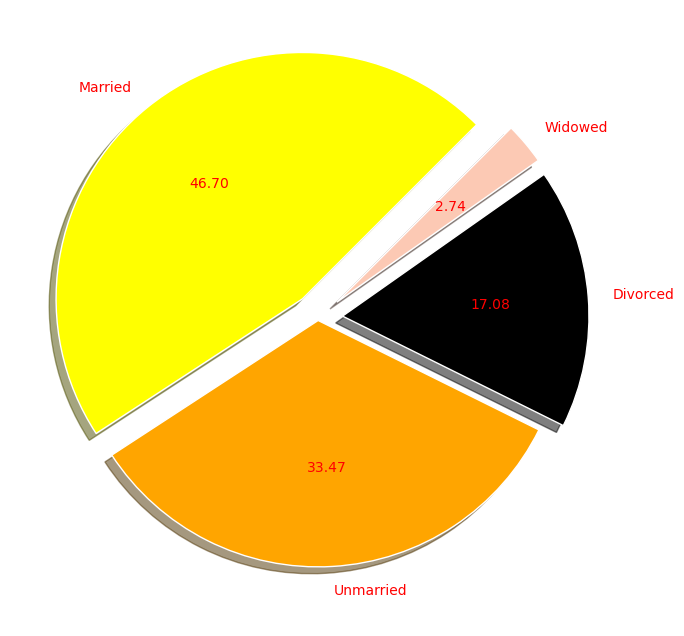

In [101]:
plt.figure(figsize=(12,8))

wp = {'linewidth' : 1, 'edgecolor' : "white" }
colors=['yellow','orange','black','#FCC9B4']

plt.pie(m['Population%'],labels=m['Status'],
        shadow=True,explode=[0.1, 0.01, 0.1,0.1],
        wedgeprops=wp,startangle = 45,autopct='%.2f',colors=colors,textprops={'color':"red"})

plt.show()

- Age &darr;&darr;

<Figure size 1200x600 with 0 Axes>

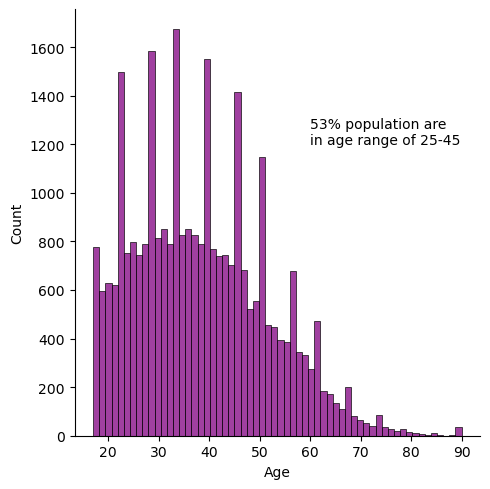

In [102]:
plt.figure(figsize=(12,6))
sns.displot(df.Age,color='purple')
plt.text(60,1200,'53% population are\nin age range of 25-45')
plt.show()

- Total Working Hours &darr;&darr;

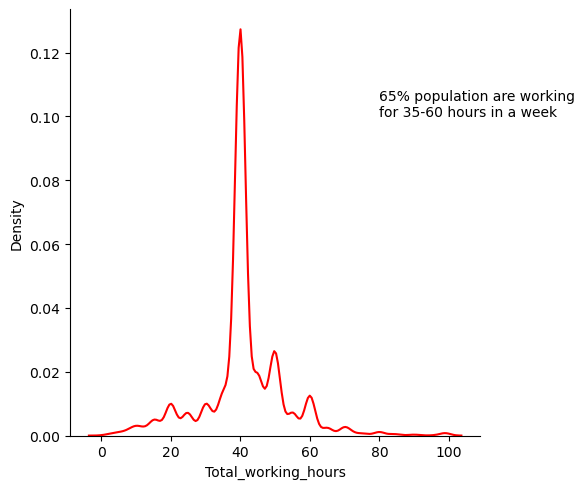

In [103]:
sns.displot(df.Total_working_hours,color='red',kind='kde')
plt.text(80,0.10,'65% population are working\nfor 35-60 hours in a week')
plt.show()

<hr style="border:1px solid black">
***Bi-variate Analysis***&darr;&darr;&darr;&darr;

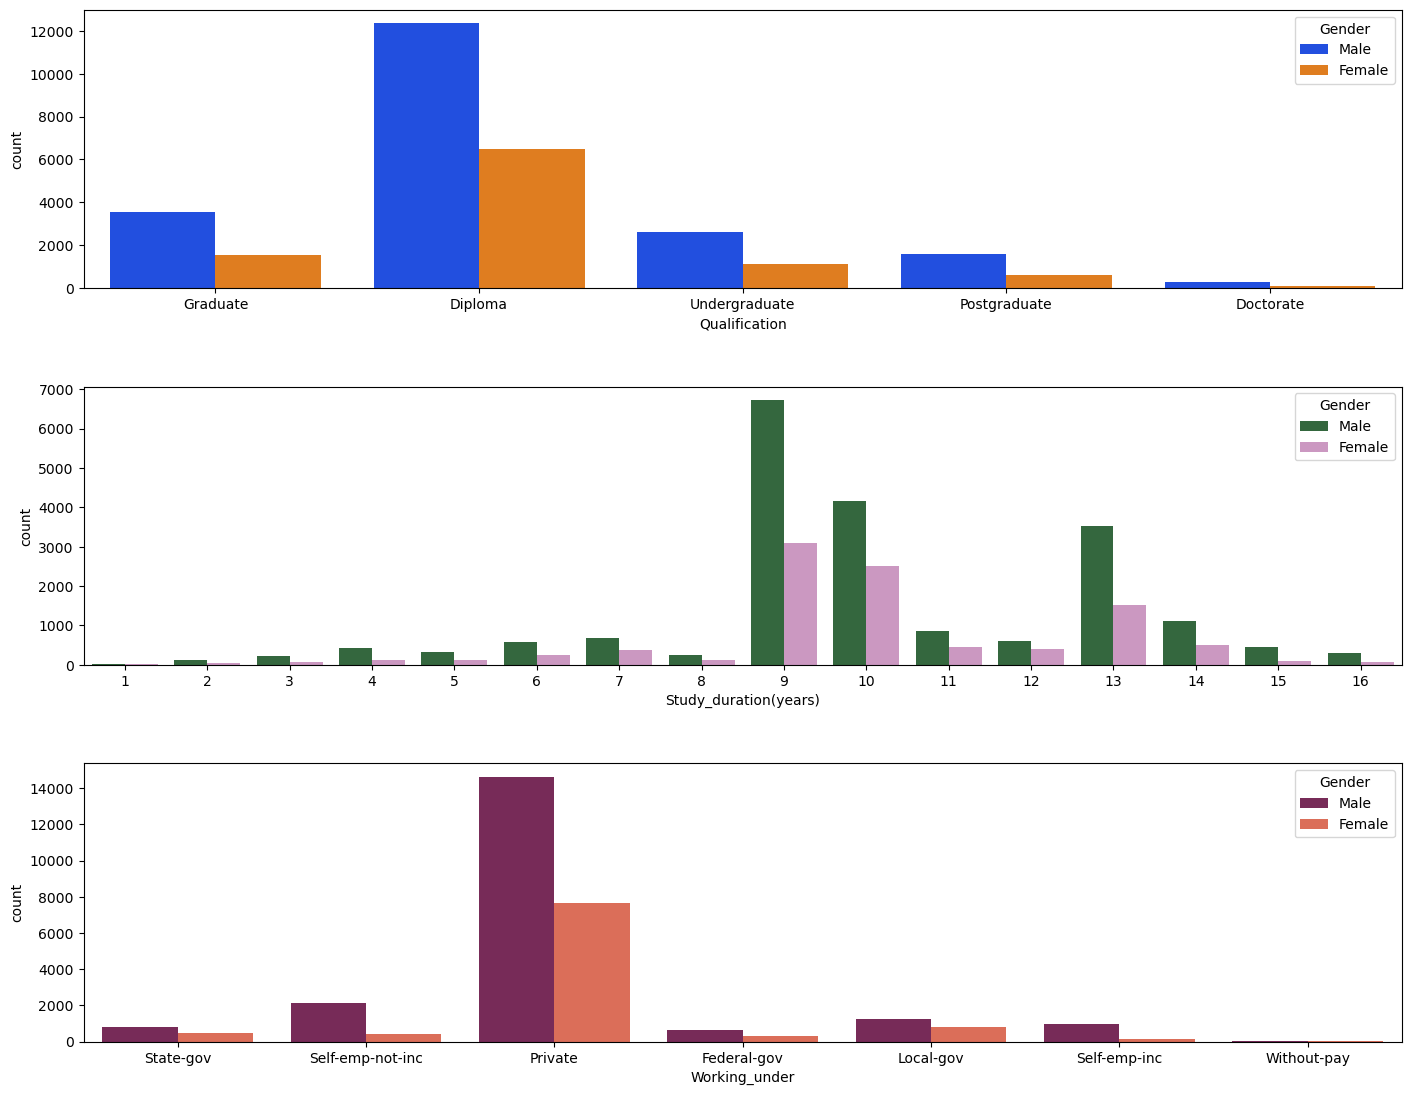

In [104]:
fig,((ax1),(ax2),(ax3)) = plt.subplots(3,1,figsize=(15,12))
fig.tight_layout(pad=5.0)

sns.countplot(data=df,x=df['Qualification'],hue=df['Gender'],ax=ax1,palette='bright')
sns.countplot(data=df,x=df['Study_duration(years)'],hue=df['Gender'],ax=ax2, palette='cubehelix')
sns.countplot(data=df,x=df['Working_under'],hue=df['Gender'],ax=ax3,palette='rocket')

plt.show()

&darr;              &darr;               &darr;           &darr;             &darr;                &darr;             &darr;&darr;                    &darr;   &darr;&darr;&darr;
1. Male are more inclined to the study than female
2. Female mostly have education below Graduate level
3. Female are more interested in taking short duration degree like diploma than to do graduation and further
4. The population of men who have less than graduate degree than men with other degree, this may happened because most men have started working early as a labour. Maybe at those time male are more focused on earning rather than studying. We can verify this statement with 2nd graph in which we can see that most of the population have invested only 9-10 years of their life in education
5. Most of the population are working in Private sector
6. Only 8.5% population are not earning any money(fall under self-emp-not-inc & without-pay) and rest 91% population are earning.

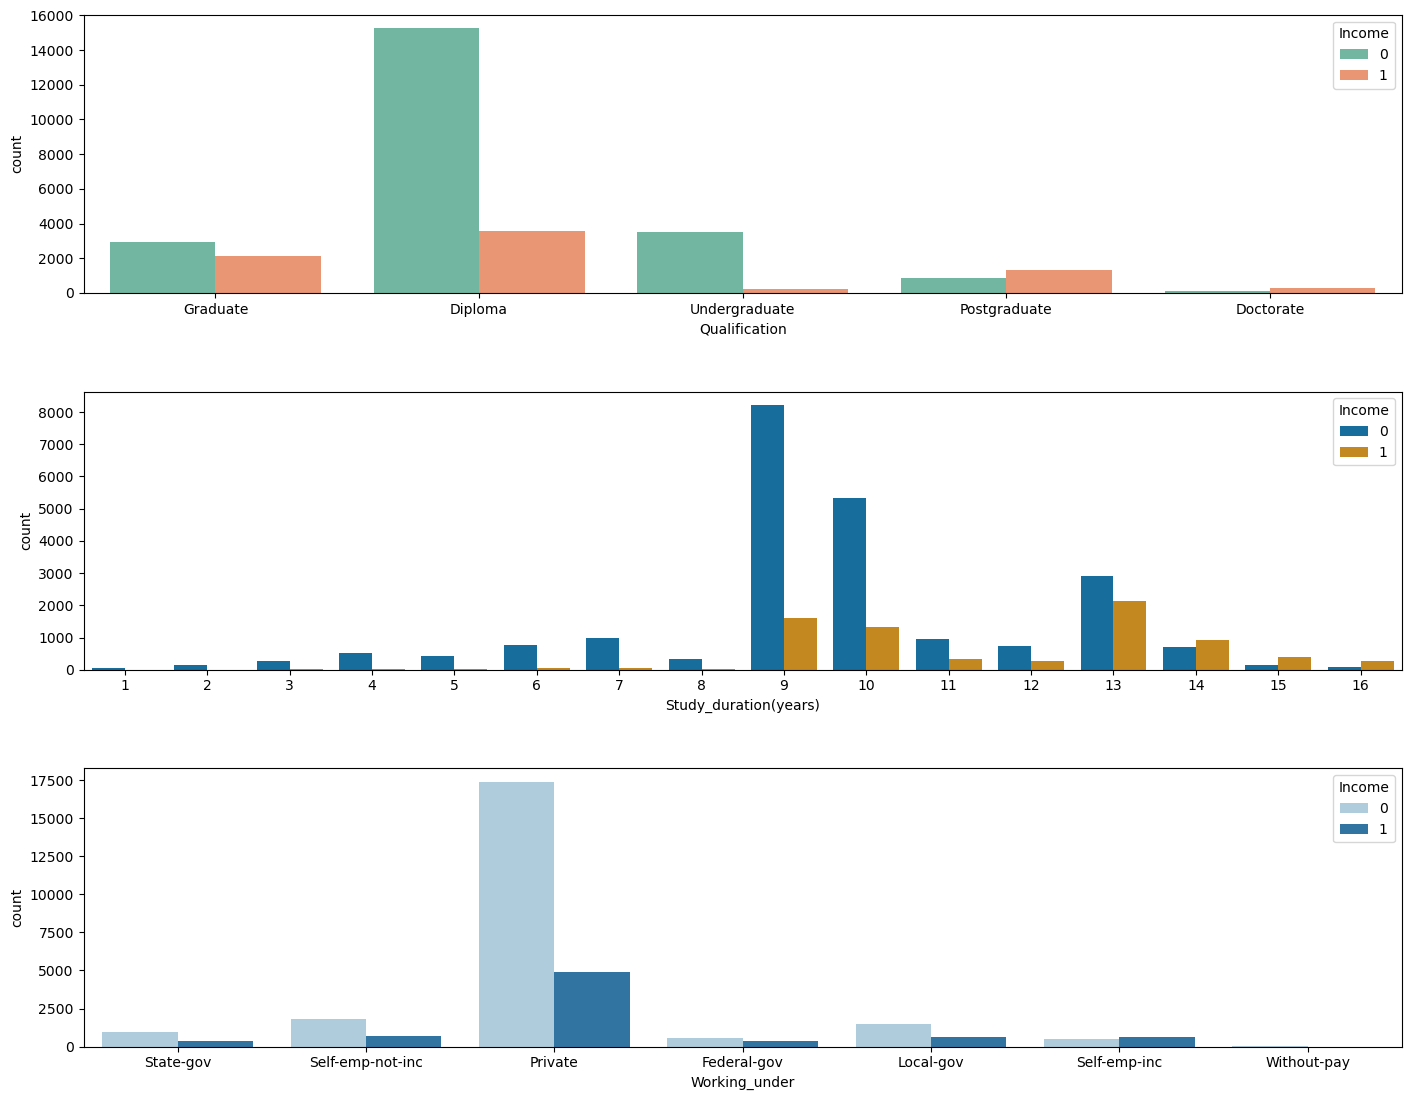

In [105]:
fig,((ax1),(ax2),(ax3)) = plt.subplots(3,1,figsize=(15,12))
fig.tight_layout(pad=5.0)

sns.countplot(data=df,x=df['Qualification'],hue=df['Income'],ax=ax1,palette='Set2')
sns.countplot(data=df,x=df['Study_duration(years)'],hue=df['Income'],ax=ax2, palette='colorblind')
sns.countplot(data=df,x=df['Working_under'],hue=df['Income'],ax=ax3,palette='Paired')

plt.show()

&darr;              &darr;               &darr;           &darr;             &darr;                &darr;             &darr;&darr;                    &darr;   &darr;&darr;&darr;

1. Most earning population belongs to Diploma holder 
2. Those who have invested 9-10 years on study are earning more than rest
3. Those who have postgraduate degree are earning more than 50K
4. Maximum population are working under private organization

<AxesSubplot:xlabel='Income', ylabel='count'>

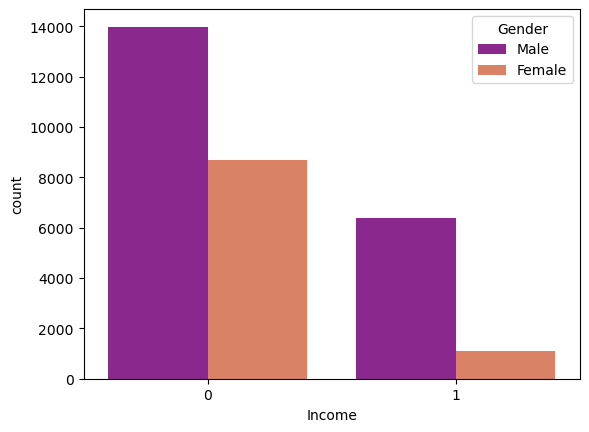

In [106]:
sns.countplot(data=df,x=df['Income'],hue=df['Gender'],palette='plasma')

&darr;              &darr;               &darr;           &darr;             &darr;                &darr;             &darr;&darr;                    &darr;   &darr;&darr;&darr;

1. Here 0 is <=50K and 1 is >50K
2. Male has greater chance of getting high salary(more than 50K)
3. The population proportion is more on the less than 50k income range than the other
4. It is clearly visible than at the time of this data survey, females are not inclined to higher education due to which very less females are getting more than 50K salary.

<AxesSubplot:xlabel='Race', ylabel='count'>

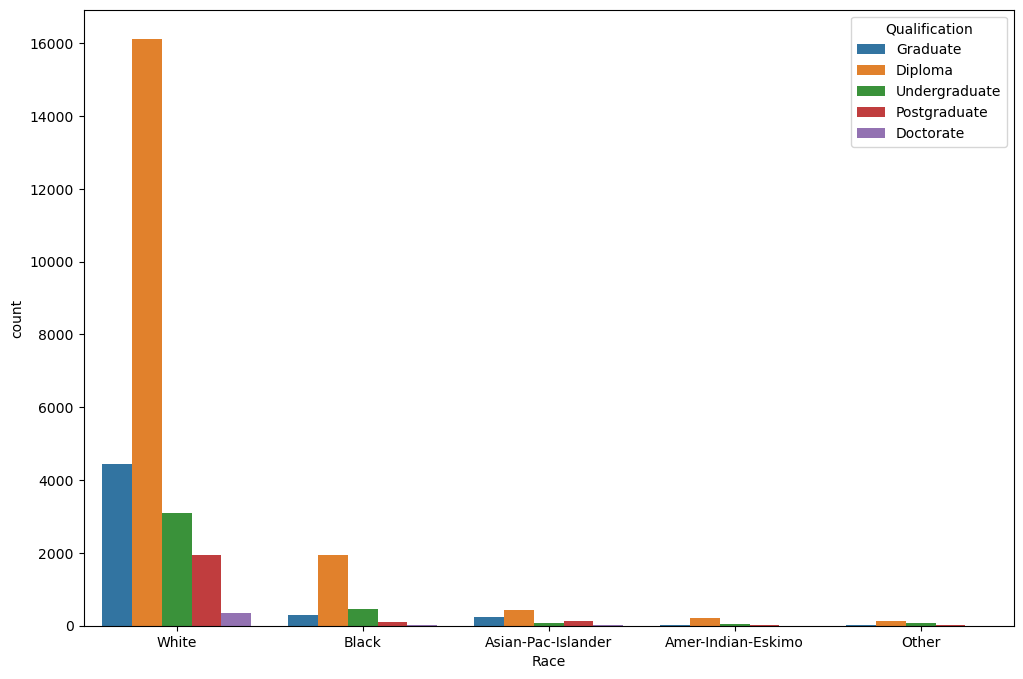

In [107]:
plt.figure(figsize=(12,8))
sns.countplot(x='Race',hue='Qualification',data=df)

&darr;              &darr;               &darr;           &darr;             &darr;                &darr;             &darr;&darr;                    &darr;   &darr;&darr;&darr;

1. White people(United States) are more in the dataset and there are more short course holder than other degrees, may be at that time education were costly and not in affordable range due to which most of them are taking easy short diploma course and get a simple job
2. Also the amount of postgraduate is good in white race people than other race. At that time other countries are probably much more poor than US due to which they couldn't get quality education.
3. As mentioned earlier, due to lack of finance other races couldn't get education

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

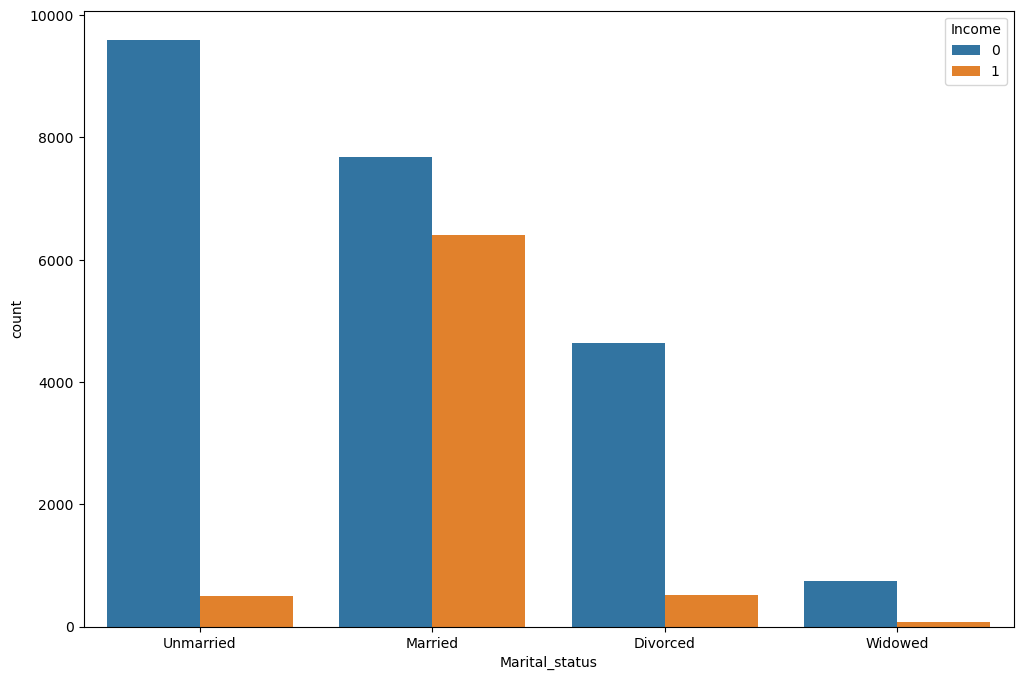

In [108]:
plt.figure(figsize=(12,8))
sns.countplot(hue='Income',x='Marital_status',data=df)

&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;

1. Most Unmarried Population are earning less than 50K
2. When it comes to married people, both income range is almost equally distributed
3. Those who are divorced may not taking higher education due to mental instability due to which they are getting less salary
4. Widowed are barely earning

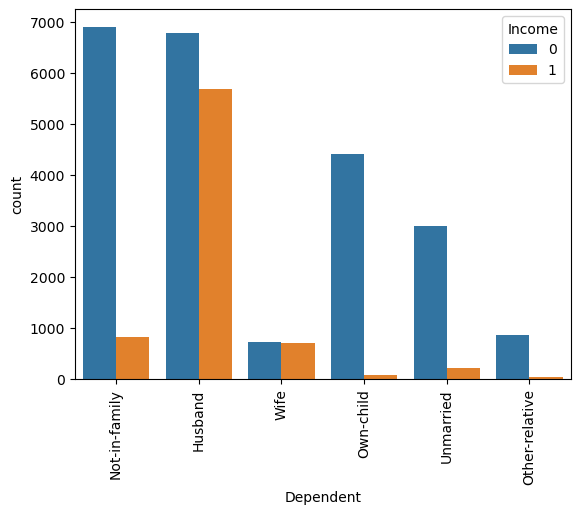

In [109]:
sns.countplot(x=df['Dependent'],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;

1. Most of the females have a husband dependent and they are earning more than 50K 
2. But it's not the case for males who have wife as they are very low in count
3. Those who are single or there is no dependent, all of them are almost earning less than 50k. Maybe due to the fact that they only have themselves to take care of due to which they don't need much money

In [110]:
low=pd.DataFrame(df[df.Income==0].Age.value_counts()/df.Income.count()*100)
low.reset_index(inplace=True)
low.columns = ['Age','%']


High=pd.DataFrame(df[df.Income==1].Age.value_counts()/df.Income.count()*100)
High.reset_index(inplace=True)
High.columns = ['Age','%']

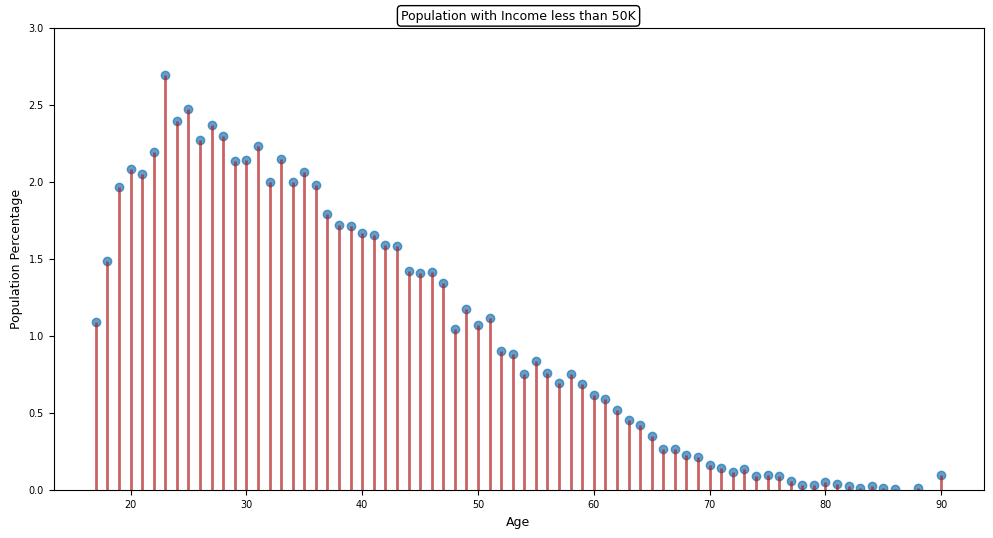

In [111]:
plt.figure(figsize=(12,6))

plt.scatter(low['Age'],low['%'],alpha=0.7)
plt.vlines(x=low['Age'], ymin=0, ymax=low['%'], color='firebrick', alpha=0.7, linewidth=2)

plt.title('Population with Income less than 50K',bbox=dict(facecolor='w',edgecolor='k', boxstyle='round'),size=9)
plt.xlabel('Age',size=9)
plt.ylabel('Population Percentage',size=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylim(0,3)

plt.show()

&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;
- Age group 20 to 45 are earning less than 50k, may be due to they have less experience in early 20's and else they are working as labours. 


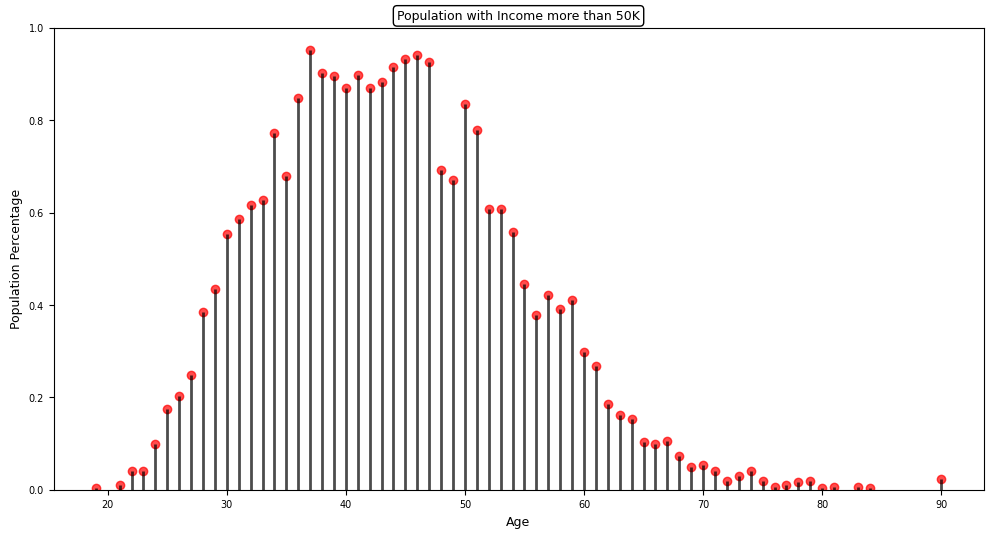

In [112]:
plt.figure(figsize=(12,6))

plt.scatter(High['Age'],High['%'],alpha=0.7,color='r')
plt.vlines(x=High['Age'], ymin=0, ymax=High['%'], color='black', alpha=0.7, linewidth=2)

plt.title('Population with Income more than 50K',bbox=dict(facecolor='w',edgecolor='k', boxstyle='round'),size=9)
plt.xlabel('Age',size=9)
plt.ylabel('Population Percentage',size=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylim(0,1)

plt.show()

&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;
- Age group of 35-50 are earning for than 50k ; maybe due to the fact that they have higher Qualification

In [113]:
a1=pd.DataFrame(df[(df.Age>=20)&(df.Age<=60)&(df.Working_under =='Private')&(df.Income==1)]['Age'].value_counts()/192.49)
a1.reset_index(inplace=True)
a1.columns = ['Age','%']

a2=pd.DataFrame(df[(df.Age>=20)&(df.Age<=60)&(df.Working_under =='Private')&(df.Income==0)]['Age'].value_counts()/192.49)
a2.reset_index(inplace=True)
a2.columns = ['Age','%']


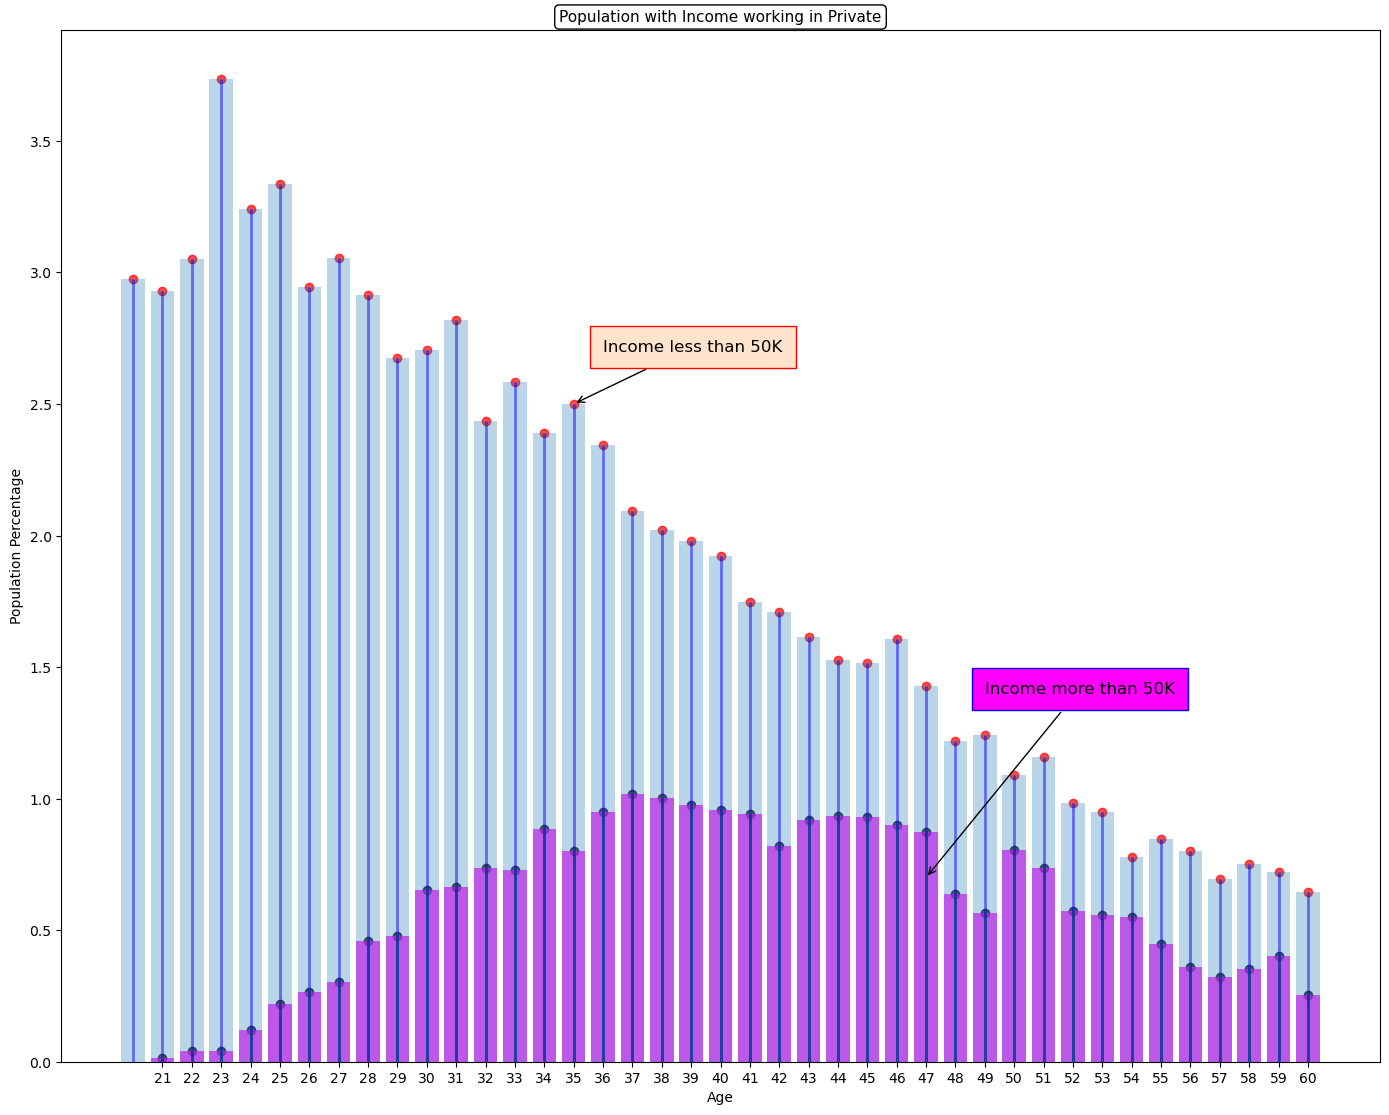

In [114]:
fig,((ax1)) = plt.subplots(1,1,figsize=(15,12))
fig.tight_layout(pad=5.0)

#Income more than 50K
ax1.scatter(a1['Age'],a1['%'],alpha=0.7,color='k')
ax1.vlines(x=a1['Age'], ymin=0, ymax=a1['%'], color='g', alpha=0.7, linewidth=2)
ax1.bar(a1['Age'],a1['%'],color='magenta',alpha=0.7)
text=ax1.annotate("Income more than 50K", xy=(47,0.7), xytext=(49,1.4), 
                  arrowprops={"arrowstyle":"->", "color":"k",'facecolor':'red'},
                  bbox=dict(facecolor='magenta', edgecolor='b', pad=8.0))
text.set_fontsize(12)

#Income less than 50K
ax1.scatter(a2['Age'],a2['%'],alpha=0.7,color='r')
ax1.vlines(x=a2['Age'], ymin=0, ymax=a2['%'], color='b', alpha=0.5, linewidth=2)
ax1.bar(a2['Age'],a2['%'],alpha=.3)
text=ax1.annotate("Income less than 50K", xy=(35,2.5), xytext=(36,2.7),
                  arrowprops={"arrowstyle":"->", "color":"k",'facecolor':'white'},
                  bbox=dict(facecolor='#ffe3cb', edgecolor='r', pad=8.0))
text.set_fontsize(12)


ax1.set_title('Population with Income working in Private',bbox=dict(facecolor='w',edgecolor='k', boxstyle='round'),size=11)
ax1.set_xlabel('Age',size=10)
ax1.set_ylabel('Population Percentage',size=10)
ax1.set_xticks(a1['Age'],fontsize=10)

plt.show()

From the above plot we can clearly see that those who are in age group(20-60) and working in private are not getting a very good pay.We can conclude that there isn't any respect and increament with seniority. There are less than 1% people of age more than 45 who are earning more than 50K

<hr style="border:1px solid black">


***Multivariate Analysis***

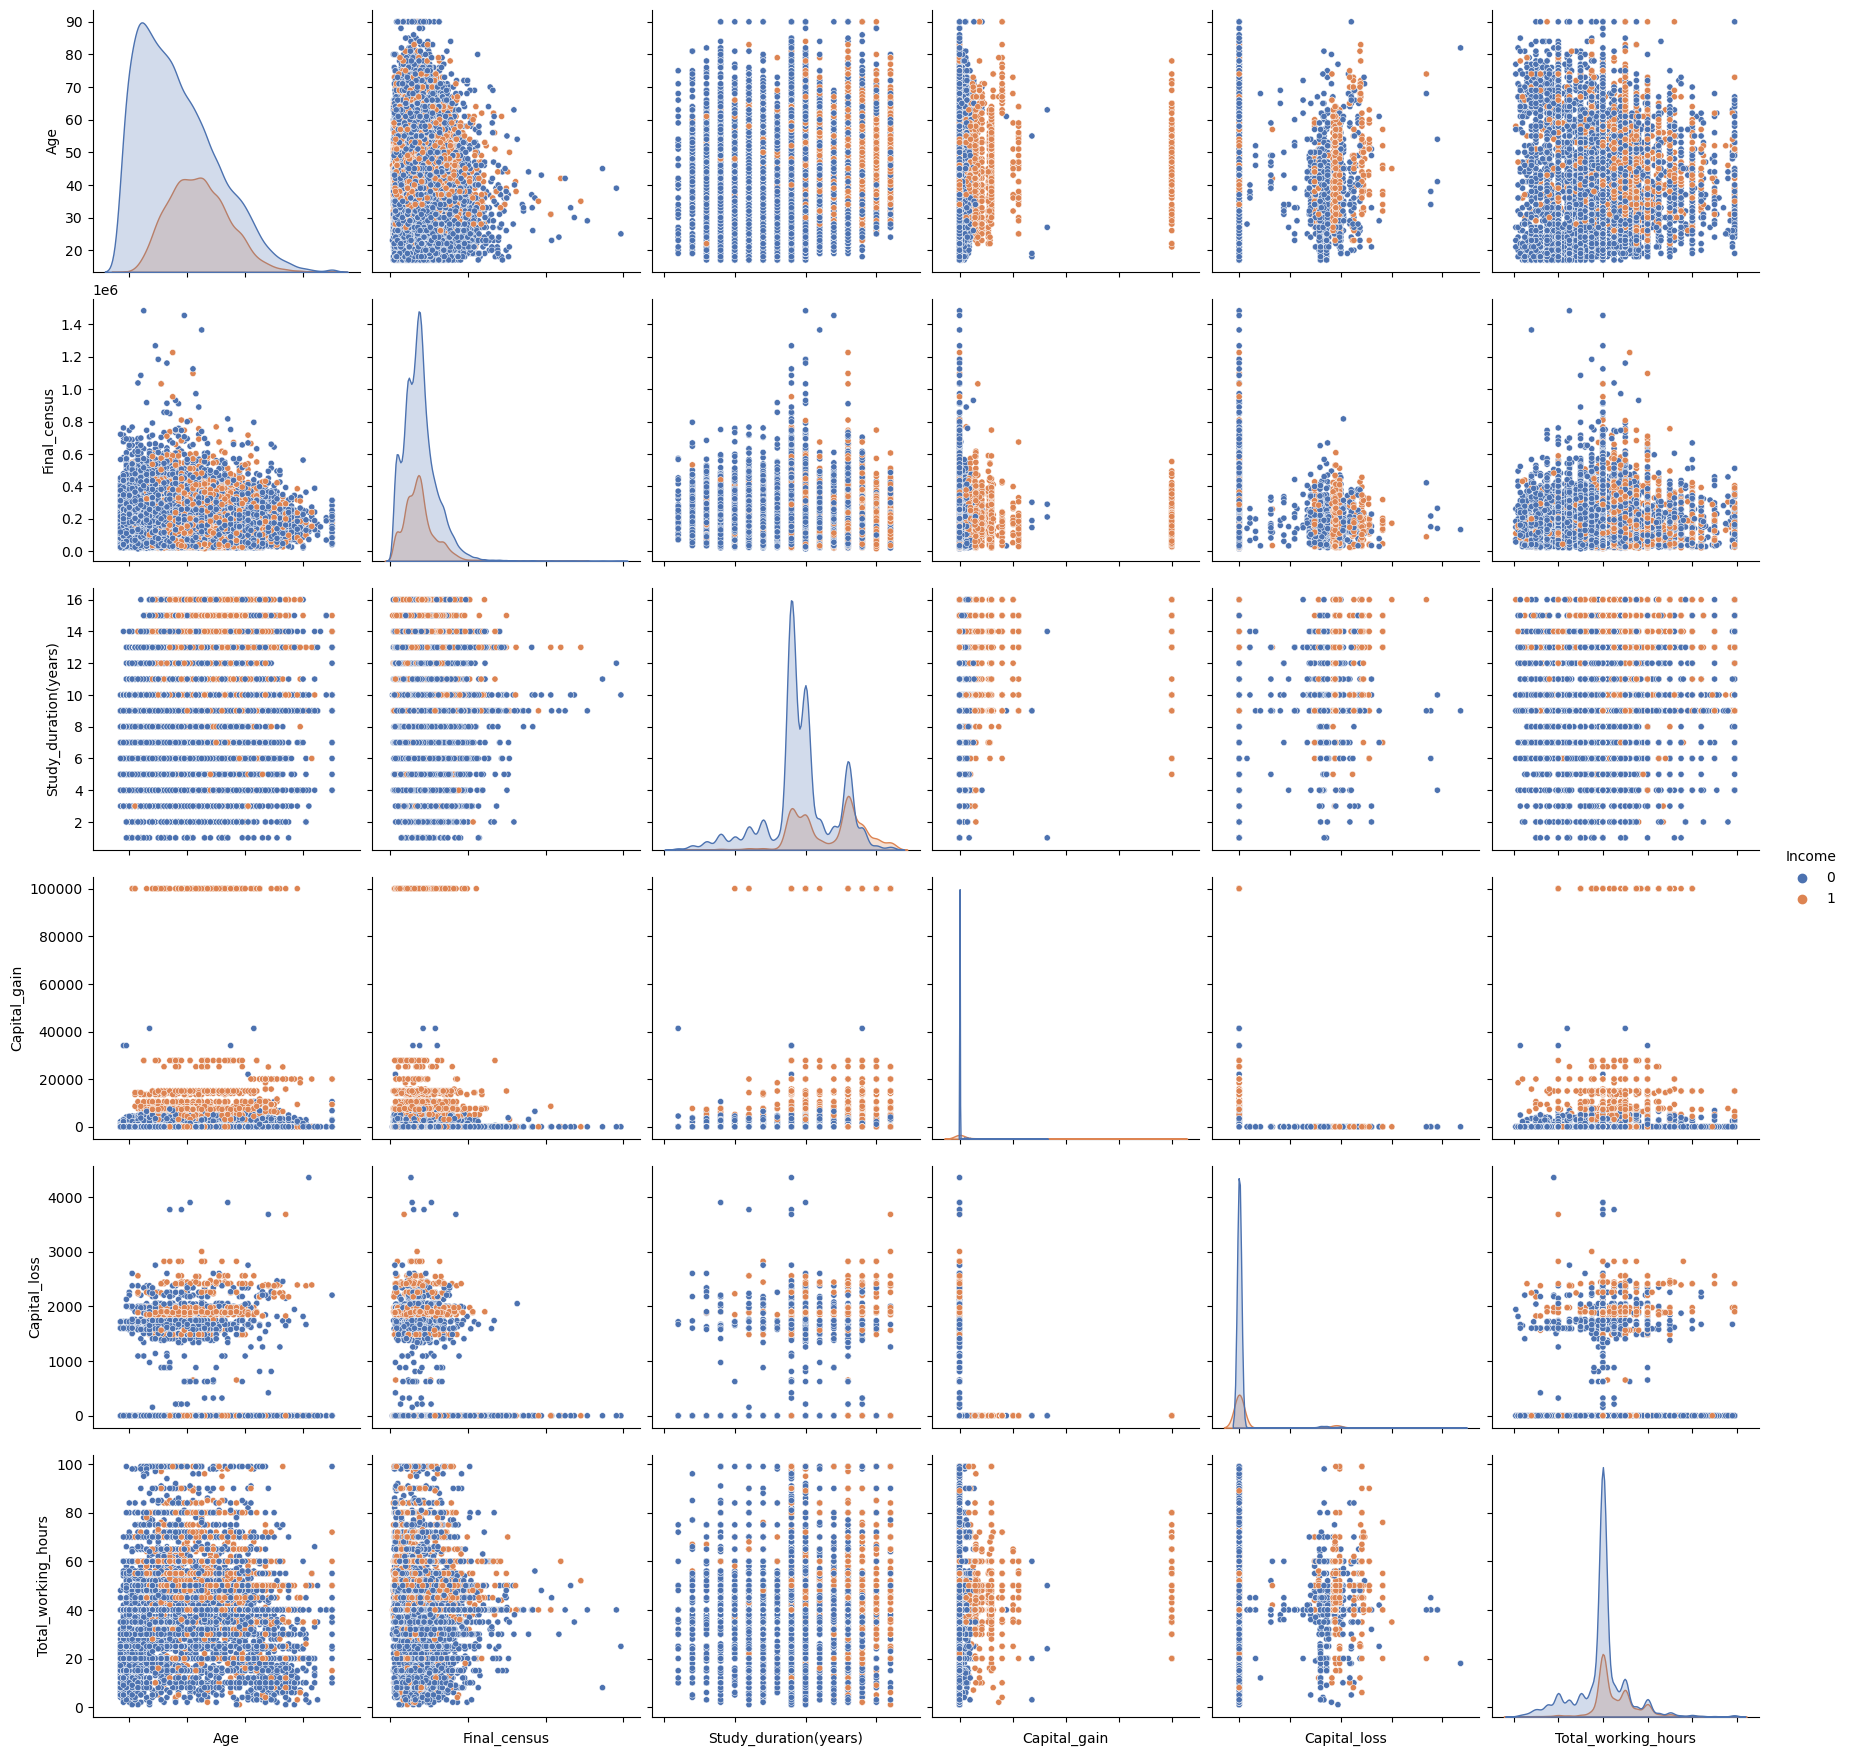

In [115]:
pp = sns.pairplot(df, hue = 'Income', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

<hr style="border:1px solid black">

## Feature Engineering

In [116]:
df[['Capital_gain','Capital_loss']].describe()

,Capital_gain,Capital_loss
count,30162.000000,30162.000000
mean,1092.007858,88.372489
std,7406.346497,404.298370
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,99999.000000,4356.000000


- As we can see there are 75% rows fill with 0 for both of these cols
- it's better to remove these cols
- There is no use of final_census in prediction 

In [117]:
db=df.drop(columns=['Capital_gain','Capital_loss','Final_census'])

I'll use both the encoder : Label encoder and One-hot-encoder

In [118]:
from sklearn.preprocessing import LabelEncoder

In [119]:
df_encoded = db.copy()
LE = LabelEncoder()
df_encoded['Working_under'] = LE.fit_transform(df_encoded['Working_under'])
df_encoded['Qualification'] = LE.fit_transform(df_encoded['Qualification'])
df_encoded['Marital_status'] = LE.fit_transform(df_encoded['Marital_status'])
df_encoded['Occupation'] = LE.fit_transform(df_encoded['Occupation'])
df_encoded['Dependent'] = LE.fit_transform(df_encoded['Dependent'])
df_encoded['Race'] = LE.fit_transform(df_encoded['Race'])
df_encoded['Gender'] = LE.fit_transform(df_encoded['Gender'])
df_encoded['country'] = LE.fit_transform(df_encoded['country'])

In [120]:
df_one_encoded = db.copy()

In [121]:
df_final= pd.get_dummies(df_one_encoded,columns=['Working_under','Qualification','Marital_status','Occupation'
                                                 ,'Dependent','Race','Gender','country'])
df_final

,Age,Study_duration(years),Total_working_hours,Income,Working_under_Federal-gov,Working_under_Local-gov,Working_under_Private,Working_under_Self-emp-inc,Working_under_Self-emp-not-inc,Working_under_State-gov,...,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia
0,39,13,40,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,50,13,13,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,38,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,9,40,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,9,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,9,20,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<hr style="border:1px solid black">

## Feature Scaling

In [122]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


##### I am using dataset with one hot encoding

In [123]:
X= df_final.drop(columns=['Income'])
y=df_final['Income']

In [124]:
scaler=MinMaxScaler()
X[['Age']] = scaler.fit_transform(X[['Age']])
X[['Study_duration(years)']]=scaler.fit_transform(X[['Study_duration(years)']])
X[['Total_working_hours']]=scaler.fit_transform(X[['Total_working_hours']])

In [125]:
X

,Age,Study_duration(years),Total_working_hours,Working_under_Federal-gov,Working_under_Local-gov,Working_under_Private,Working_under_Self-emp-inc,Working_under_Self-emp-not-inc,Working_under_State-gov,Working_under_Without-pay,...,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia
0,0.301370,0.800000,0.397959,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.122449,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.397959,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.397959,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.397959,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.733333,0.377551,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,0.315068,0.533333,0.397959,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,0.561644,0.533333,0.397959,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,0.068493,0.533333,0.193878,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [126]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=101,test_size=0.20)

In [127]:
X_test.shape

(6033, 87)

## Model Building

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

### Model 1 - Logistic Regression

In [129]:
lr = LogisticRegression(C=100)
lr.fit(X_train,y_train)
print('Training Accuracy: ',lr.score(X_train,y_train))

Training Accuracy:  0.8326909527953914


In [130]:
Y_predict = lr.predict(X_test)
print('Testing Accuracy ',metrics.accuracy_score(y_test,Y_predict))

Testing Accuracy  0.8299353555445053


In [131]:
confusion_matrix(y_test, Y_predict)

array([[4124,  352],
       [ 674,  883]], dtype=int64)

In [132]:
print(metrics.classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4476
           1       0.71      0.57      0.63      1557

    accuracy                           0.83      6033
   macro avg       0.79      0.74      0.76      6033
weighted avg       0.82      0.83      0.82      6033



### Model 2 - Support Vector Machine

In [133]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [134]:
score_svc = svc.score(X_train,y_train)
print('The Training accuracy of SVC is', score_svc)

The Training accuracy of SVC is 0.834514484645033


In [135]:
Y_predict_svc = svc.predict(X_test)
print('Testing accuracy score is : ',metrics.accuracy_score(y_test,Y_predict_svc))

Testing accuracy score is :  0.8244654400795625


In [136]:
confusion_matrix(y_test, Y_predict_svc)

array([[4132,  344],
       [ 715,  842]], dtype=int64)

In [137]:
print(metrics.classification_report(y_test,Y_predict_svc))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      4476
           1       0.71      0.54      0.61      1557

    accuracy                           0.82      6033
   macro avg       0.78      0.73      0.75      6033
weighted avg       0.82      0.82      0.82      6033



### Model 3 - Decision Tree Classifier

In [138]:
dst = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)

In [139]:
dst.fit(X_train,y_train)
print('Training accuracy score is : ',dst.score(X_train,y_train))

Training accuracy score is :  0.8152845124124497


In [140]:
Y_predict_dst = dst.predict(X_test)
print('Testing accuracy score is : ',metrics.accuracy_score(y_test,Y_predict_dst))

Testing accuracy score is :  0.814685894248301


In [141]:
confusion_matrix(y_test, Y_predict_dst)

array([[4257,  219],
       [ 899,  658]], dtype=int64)

In [142]:
print(metrics.classification_report(y_test,Y_predict_dst))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      4476
           1       0.75      0.42      0.54      1557

    accuracy                           0.81      6033
   macro avg       0.79      0.69      0.71      6033
weighted avg       0.81      0.81      0.80      6033



### Model 4 - K nearest Neighbors

In [ ]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 50):
    kn = KNeighborsClassifier(n_neighbors = k)
    kn.fit(X_train, y_train)
  
    training_score = kn.score(X_train, y_train)
    test_score = kn.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [ ]:
for keys, values in scores.items():
    print(keys, ':', values)

so I'll go with k=15 as it seems optimal

In [143]:
kn = KNeighborsClassifier(n_neighbors = 13)
kn.fit(X_train, y_train)
kn.score(X_train, y_train)

0.8501802809896805

In [144]:
Y_predict_knn = kn.predict(X_test)

In [145]:
metrics.accuracy_score(y_test,Y_predict_knn)

0.8339134758826454

In [146]:
confusion_matrix(y_test, Y_predict_knn)

array([[4049,  427],
       [ 575,  982]], dtype=int64)

In [147]:
print(metrics.classification_report(y_test,Y_predict_knn))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4476
           1       0.70      0.63      0.66      1557

    accuracy                           0.83      6033
   macro avg       0.79      0.77      0.78      6033
weighted avg       0.83      0.83      0.83      6033



### Model 5 -- Random Forest Classifier

In [148]:
rfc = RandomForestClassifier(max_depth=9, max_features=None , max_leaf_nodes=9,n_estimators=500)

In [149]:
rfc.fit(X_train,y_train)
rfc.score(X_train, y_train)

0.8212524348294583

In [150]:
y_pred_rfc = rfc.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_rfc))

0.819327034642798


In [151]:
confusion_matrix(y_test,y_pred_rfc)

array([[4208,  268],
       [ 822,  735]], dtype=int64)

In [152]:
print(metrics.classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4476
           1       0.73      0.47      0.57      1557

    accuracy                           0.82      6033
   macro avg       0.78      0.71      0.73      6033
weighted avg       0.81      0.82      0.81      6033



### Model 6 -- XGbBoost

In [153]:
import xgboost as xgb

In [154]:
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)
print('Training Accuracy: ',xg.score(X_train, y_train))

Training Accuracy:  0.8675452774669485


In [155]:
print('Testing Accuracy: ',metrics.accuracy_score(y_test, y_pred_xg))

Testing Accuracy:  0.7851815017404277


In [156]:
y_pred_xg= xg.predict(X_test)
print(confusion_matrix(y_test, y_pred_xg))

[[4100  376]
 [ 586  971]]


In [157]:
print(metrics.classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4476
           1       0.72      0.62      0.67      1557

    accuracy                           0.84      6033
   macro avg       0.80      0.77      0.78      6033
weighted avg       0.84      0.84      0.84      6033



### XGBoost and KNN are the best model 
&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;&uarr;

### Oversampling and Undersampling

In [158]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [159]:
smote = SMOTE()

In [160]:
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [161]:
y_train_smote.value_counts()

0    18178
1    18178
Name: Income, dtype: int64

### LOGISTIC REGRESSION with oversampling

In [162]:
lr = LogisticRegression()
lr.fit(X_train_smote, y_train_smote)
print('Training Accuracy: ',lr.score(X_train_smote, y_train_smote))
print('')
Y_predict = lr.predict(X_test)
print(metrics.accuracy_score(y_test,Y_predict))
print('')
print(confusion_matrix(y_test, Y_predict))
print('')
print(metrics.classification_report(y_test,Y_predict))

Training Accuracy:  0.8321872593244581

0.7966185977125808

[[3547  929]
 [ 298 1259]]

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      4476
           1       0.58      0.81      0.67      1557

    accuracy                           0.80      6033
   macro avg       0.75      0.80      0.76      6033
weighted avg       0.83      0.80      0.81      6033



### KNN With Oversampling

In [163]:
K = []
training = []
test = []
scores = {}
  
for k in range(20, 52):
    kn = KNeighborsClassifier(n_neighbors = k)
    kn.fit(X_train_smote, y_train_smote)
  
    training_score = kn.score(X_train_smote, y_train_smote)
    test_score = kn.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

for keys, values in scores.items():
    print(keys, ':', values)

20 : [0.8360380679942788, 0.7860102768108735]
21 : [0.8315271206953461, 0.7758992209514338]
22 : [0.831362086038068, 0.7812033814022874]
23 : [0.8289140719551106, 0.7758992209514338]
24 : [0.8308944878424469, 0.7805403613459307]
25 : [0.8272087138299042, 0.7740759157964529]
26 : [0.8283089448784244, 0.7767279960218797]
27 : [0.8252007921663549, 0.7722526106414719]
28 : [0.8264660578721531, 0.778882811205039]
29 : [0.8245956650896689, 0.773247140726007]
30 : [0.8249532401804379, 0.7775567710923256]
31 : [0.8228352954120365, 0.7702635504724018]
32 : [0.8233303993838706, 0.775070445880988]
33 : [0.8203322697766531, 0.7724183656555611]
34 : [0.8207173506436352, 0.7758992209514338]
35 : [0.81947959071405, 0.7722526106414719]
36 : [0.8202222466718011, 0.7773910160782364]
37 : [0.8186269116514469, 0.7749046908668987]
38 : [0.819782154252393, 0.778882811205039]
39 : [0.8192870502805589, 0.7762307309796121]
40 : [0.8203047640004401, 0.7792143212332173]
41 : [0.8186269116514469, 0.77606497596552

In [164]:
kn = KNeighborsClassifier(n_neighbors = 20)
kn.fit(X_train_smote, y_train_smote)

print('Training Accuracy: ',kn.score(X_train_smote, y_train_smote))
print('')
Y_predict_knn = kn.predict(X_test)

print('Testing Accuracy is : ',metrics.accuracy_score(y_test,Y_predict_knn))
print('')
print(confusion_matrix(y_test, Y_predict_knn))
print('')
print(metrics.classification_report(y_test,Y_predict_knn))

Training Accuracy:  0.8360380679942788

Testing Accuracy is :  0.7860102768108735

[[3438 1038]
 [ 253 1304]]

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      4476
           1       0.56      0.84      0.67      1557

    accuracy                           0.79      6033
   macro avg       0.74      0.80      0.76      6033
weighted avg       0.83      0.79      0.80      6033



### XGBOOST With Oversampling

In [174]:
xg = xgb.XGBClassifier()
xg.fit(X_train_smote, y_train_smote)
print('Training accuracy is: ',xg.score(X_train_smote, y_train_smote))
print('')
y_pred_xg= xg.predict(X_test)
print('Testing Accuracy is : ',metrics.accuracy_score(y_test, y_pred_xg))
print('')
print(confusion_matrix(y_test, y_pred_xg))
print('')
print(metrics.classification_report(y_test,y_pred_xg))

Training accuracy is:  0.9024095059962592

Testing Accuracy is :  0.8296038455163268

[[3891  585]
 [ 443 1114]]

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4476
           1       0.66      0.72      0.68      1557

    accuracy                           0.83      6033
   macro avg       0.78      0.79      0.78      6033
weighted avg       0.84      0.83      0.83      6033



#### After oversampling Logistic Regression achieved balanced with very high quality scores
#### XGboost improved a lot after oversampling

<hr style="border:1px solid black">

### UnderSampling

In [166]:
under = RandomUnderSampler()

In [167]:
X_train_under,Y_train_under = under.fit_resample(X_train,y_train)

In [168]:
Y_train_under.value_counts()

0    5951
1    5951
Name: Income, dtype: int64

### LOGISTIC REGRESSION with undersampling

In [169]:
lr = LogisticRegression()
lr.fit(X_train_under,Y_train_under)
print('Training Accuracy: ',lr.score(X_train_under,Y_train_under))
print('')
Y_predict = lr.predict(X_test)
print('Testing Accuracy',metrics.accuracy_score(y_test,Y_predict))
print('')
print(confusion_matrix(y_test, Y_predict))
print('')
print(metrics.classification_report(y_test,Y_predict))

Training Accuracy:  0.8089396740043691

Testing Accuracy 0.7886623570363004

[[3436 1040]
 [ 235 1322]]

              precision    recall  f1-score   support

           0       0.94      0.77      0.84      4476
           1       0.56      0.85      0.67      1557

    accuracy                           0.79      6033
   macro avg       0.75      0.81      0.76      6033
weighted avg       0.84      0.79      0.80      6033



### KNN With undersampling

In [170]:
K = []
training = []
test = []
scores = {}
error_rate = []

for k in range(1,35):
    kn = KNeighborsClassifier(n_neighbors = k)
    kn.fit(X_train_under,Y_train_under)
  
    training_score = kn.score(X_train_under,Y_train_under)
    test_score = kn.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
    pred_i = kn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
for keys, values in scores.items():
    print(keys, ':', values)

1 : [0.962275247857503, 0.7440742582463119]
2 : [0.8484288354898336, 0.789325377092657]
3 : [0.8612838178457403, 0.7739101607823636]
4 : [0.844395899848765, 0.7942980275153323]
5 : [0.8429675684758864, 0.7777225261064147]
6 : [0.8350697361787934, 0.7987734128957401]
7 : [0.8313728785078138, 0.7833581965854467]
8 : [0.8264997479415225, 0.7979446378252942]
9 : [0.8278440598218787, 0.7861760318249627]
10 : [0.8226348512854982, 0.7984419028675618]
11 : [0.8215425978827088, 0.7866732968672302]
12 : [0.8184338766593849, 0.7979446378252942]
13 : [0.8186019156444295, 0.7858445217967843]
14 : [0.8175936817341624, 0.7961213326703133]
15 : [0.8183498571668627, 0.7833581965854467]
16 : [0.8175936817341624, 0.7934692524448864]
17 : [0.8172576037640733, 0.7845184816840709]
18 : [0.8158292723911947, 0.792143212332173]
19 : [0.815913291883717, 0.7850157467263384]
20 : [0.8148210384809276, 0.7904856621912812]
21 : [0.8137287850781382, 0.7851815017404277]
22 : [0.8132246681230045, 0.7908171722194597]
23

Minimum error:- 0.2012265871042599 at K = 5


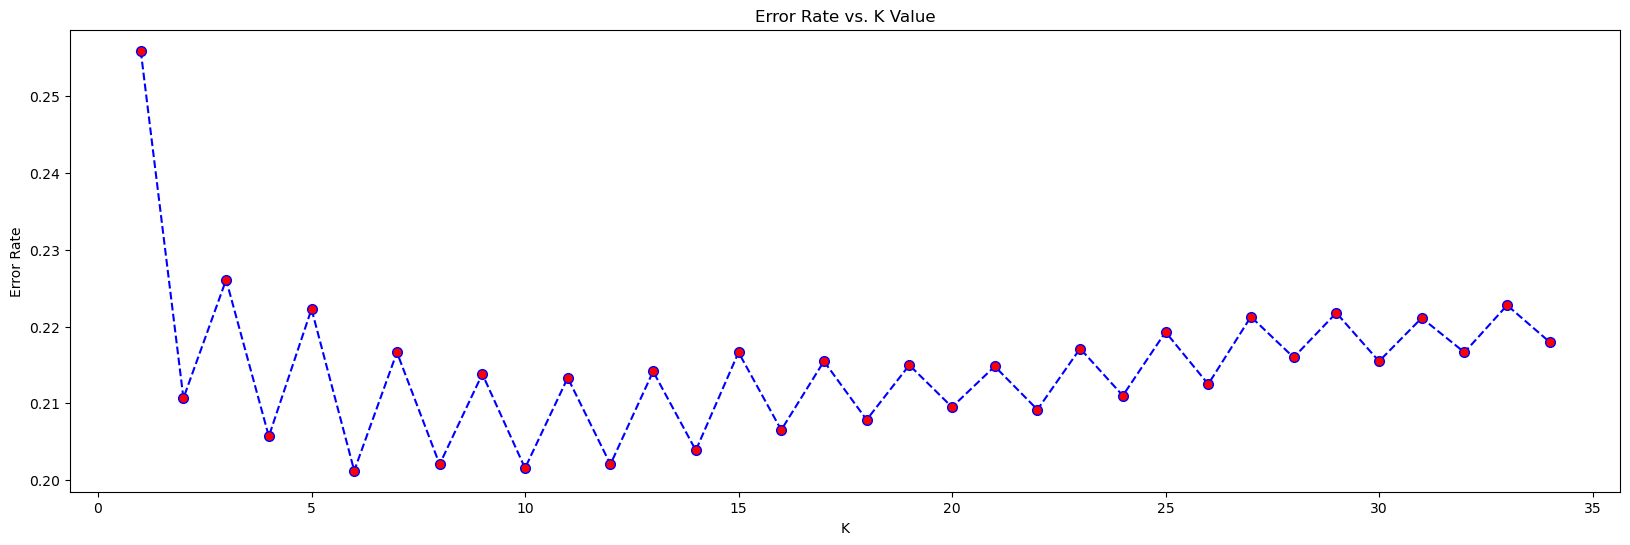

In [171]:
plt.figure(figsize=(20,6))
plt.plot(range(1,35),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=7)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [175]:
kn = KNeighborsClassifier(n_neighbors = 4)
kn.fit(X_train_under,Y_train_under)

print('Training Accuracy: ',kn.score(X_train_under,Y_train_under))
print('')
Y_predict_knn = kn.predict(X_test)

print('Testing Accuracy is : ',metrics.accuracy_score(y_test,Y_predict_knn))
print('')
print(confusion_matrix(y_test, Y_predict_knn))
print('')
print(metrics.classification_report(y_test,Y_predict_knn))

Training Accuracy:  0.844395899848765

Testing Accuracy is :  0.7942980275153323

[[3678  798]
 [ 443 1114]]

              precision    recall  f1-score   support

           0       0.89      0.82      0.86      4476
           1       0.58      0.72      0.64      1557

    accuracy                           0.79      6033
   macro avg       0.74      0.77      0.75      6033
weighted avg       0.81      0.79      0.80      6033



### XGBOOST With Undersampling

In [173]:
xg = xgb.XGBClassifier()
xg.fit(X_train_under,Y_train_under)
print('Training accuracy is: ',xg.score(X_train_under,Y_train_under))
print('')
y_pred_xg= xg.predict(X_test)
print('Testing Accuracy is : ',metrics.accuracy_score(y_test, y_pred_xg))
print('')
print('confusion matrix\n',confusion_matrix(y_test, y_pred_xg))
print('')
print(metrics.classification_report(y_test,y_pred_xg))

Training accuracy is:  0.8657368509494202

Testing Accuracy is :  0.7881650919940328

confusion matrix
 [[3425 1051]
 [ 227 1330]]

              precision    recall  f1-score   support

           0       0.94      0.77      0.84      4476
           1       0.56      0.85      0.68      1557

    accuracy                           0.79      6033
   macro avg       0.75      0.81      0.76      6033
weighted avg       0.84      0.79      0.80      6033



<hr style="border:1px solid black">

### XGBoost with oversampling is giving the best result

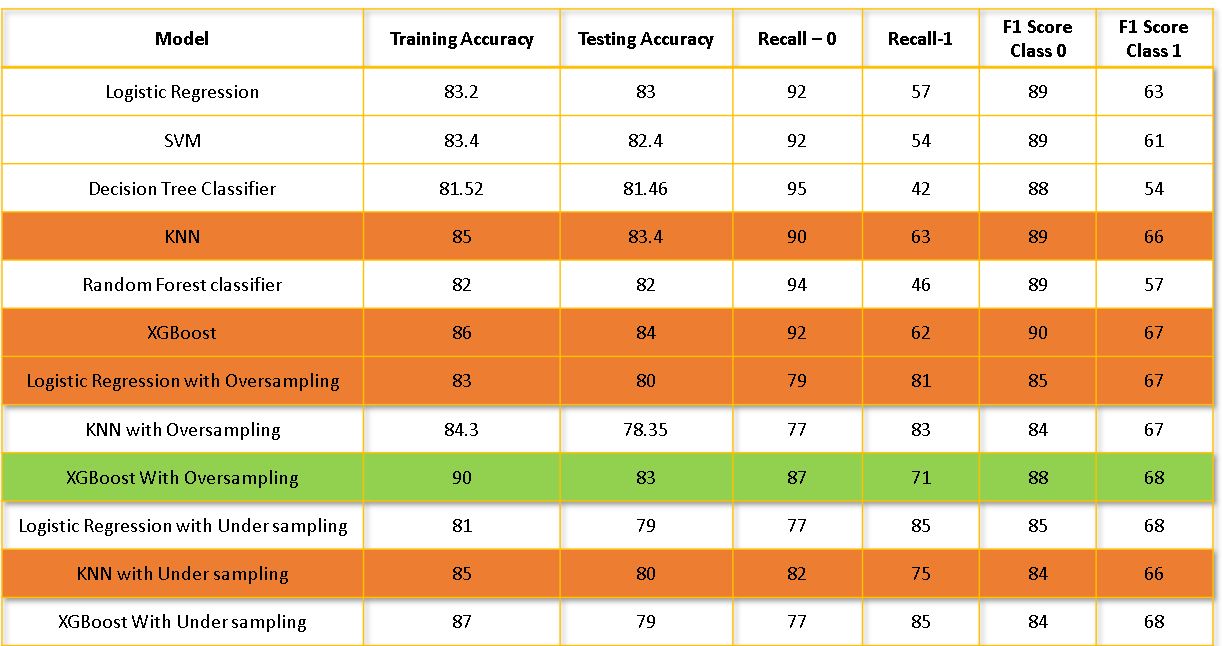